### Logistic Regression

Logistic Regression configuration 

Parameters:

* penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
    - Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.
        - New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)

* dualbool, default=False
    - Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
    
* tolfloat, default=1e-4
    - Tolerance for stopping criteria.
    
* Cfloat, default=1.0
    - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

* fit_intercept bool, default=True
    - Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    
* intercept_scaling float, default=1
    - Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.

        - Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.
    
* class_weight dict or ‘balanced’, default=None
    - Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

    - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
    
        - Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

        - New in version 0.17: class_weight=’balanced’
    
* random_state int, RandomState instance, default=None
    - Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. See Glossary for details.
    
* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    - Algorithm to use in the optimization problem.

    - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

    - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

    - ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

    - ‘liblinear’ and ‘saga’ also handle L1 penalty

    - ‘saga’ also supports ‘elasticnet’ penalty

    - ‘liblinear’ does not support setting penalty='none'

        - Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

        - New in version 0.17: Stochastic Average Gradient descent solver.

        - New in version 0.19: SAGA solver.

        - Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.
    
- max_iter int, default=100
    - Maximum number of iterations taken for the solvers to converge.
    
- multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
    - If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

        - New in version 0.18: Stochastic Average Gradient descent solver for ‘multinomial’ case.

        - Changed in version 0.22: Default changed from ‘ovr’ to ‘auto’ in 0.22.
    
- verbose int, default=0
    - For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.
    
- warm_start bool, default=False
    - When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver. See the Glossary.

        - New in version 0.17: warm_start to support lbfgs, newton-cg, sag, saga solvers.
    
- n_jobs int, default=None
    - Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
    
- l1_ratio float, default=None
    - The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.



In [76]:
# Pandas for data loading and processing
import pandas as pd
#Data Analysis
from sklearn.linear_model import LogisticRegression
#Data splitting 
from sklearn.model_selection import train_test_split
#Numpy for diverse math functions
import numpy as np
#Model validation 
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import f1_score
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Upsampling
from sklearn.utils import resample

In [27]:
# Reading data from schwartau
schwartau_daily = pd.read_csv('data/summary/schwartau_daily_filtered.csv')
wurzburg_daily = pd.read_csv('data/summary/wurzburg_daily_filtered.csv')

In [89]:
#describe our data
wurzburg_daily[wurzburg_daily.select_dtypes(exclude='object').columns].describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))
# Display new class counts
wurzburg_daily.flow_processed.value_counts()

0    621
1    101
Name: flow_processed, dtype: int64

In [90]:
#describe our data
schwartau_daily[schwartau_daily.select_dtypes(exclude='object').columns].describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))
# Display new class counts
schwartau_daily.flow_processed.value_counts()

0    513
1    363
Name: flow_processed, dtype: int64

In [106]:
# split into test and train 
# Separate X and Y (Characteristics and Labels)
labels_schwartau = schwartau_daily['flow_processed']
data_schwartau = schwartau_daily.drop(['flow_processed','timestamp'], axis=1)
x_train_schwartau, x_test_schwartau, y_train_schwartau, y_test_schwartau = train_test_split(data_schwartau, labels_schwartau, test_size=0.20)

In [107]:
# split into test and train 
# Separate X and Y (Characteristics and Labels)
# Upsample

# Separate majority and minority classes
df_majority = wurzburg_daily[wurzburg_daily.flow_processed==0]
df_minority = wurzburg_daily[wurzburg_daily.flow_processed==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=621,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

labels_wurzburg = df_upsampled['flow_processed']
data_wurzburg = df_upsampled.drop(['flow_processed','timestamp'], axis=1)
x_train_wurzburg, x_test_wurzburg, y_train_wurzburg, y_test_wurzburg = train_test_split(data_wurzburg, labels_wurzburg, test_size=0.20, stratify=labels_wurzburg)

In [108]:
#Model preparation (parameters)
penalty_values = ['l1', 'l2', 'elasticnet', 'none']
dual_value = False # Can be True or False
tol_value = 1e-4
C_value = 1
fit_intercept_value = True # Can be True or False
intercept_scaling_value = 1
class_weight_value = None
random_state_value = 1019124610
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter_value = 10000
multi_class_values = ['auto', 'ovr', 'multinomial']
verbose_value = 0
n_jobs_value = None
l1_ratio_values = np.arange(0.0,1.1,0.1)

# LR = LogisticRegression(penalty='none', dual=False, 
#                    tol=0.0001, C=1.0, fit_intercept=True, 
#                    intercept_scaling=1, class_weight=None, 
#                    random_state=None, solver='lbfgs', max_iter=100, 
#                    multi_class='auto', verbose=0, warm_start=False, 
#                    n_jobs=None, l1_ratio=None);

In [109]:
def modelo_schwartau(LR):
    LR.fit(x_train_schwartau,y_train_schwartau)
    y_test_predicted = LR.predict(x_test_schwartau)
    y_test_scores = LR.decision_function(x_test_schwartau)

    MCC = matthews_corrcoef(y_test_schwartau, y_test_predicted)
#     print("matthews_corrcoef", MCC)
    ACC = accuracy_score(y_test_schwartau, y_test_predicted)
#     print("Accuracy", ACC)
    roc_auc=roc_auc_score(y_test_schwartau, y_test_scores)
#     print("ROC", roc_auc)
    f1=f1_score(y_test_schwartau, y_test_predicted, average='weighted')
    return [MCC,ACC,roc_auc,f1]

In [110]:
complete_results_LR_schwartau = []
for penalty in penalty_values:
    for solver in solver_values:
        if solver == 'lbfgs':
            if (penalty != 'l2'or penalty != 'none') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_schwartau(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_schwartau.append(results)
        if solver == 'newton-cg':
            if (penalty != 'l2'or penalty != 'none') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_schwartau(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_schwartau.append(results)
        if solver == 'liblinear':
            if (penalty == 'none' or penalty == 'elasticnet') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_schwartau(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_schwartau.append(results)
        if solver == 'sag':
            if (penalty != 'l2'or penalty != 'none') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_schwartau(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_schwartau.append(results)
        if solver == 'saga':
            ## Generar modelo
            if penalty != 'elasticnet':
#                 print("-----------------------")
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                       tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                       intercept_scaling=1, class_weight=class_weight_value, 
                       random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                       multi_class='auto', verbose=verbose_value, warm_start=False, 
                       n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_schwartau(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_schwartau.append(results)
            else:
                for l1_ratio in l1_ratio_values:
#                     print("-----------------------")
                    LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                           tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                           intercept_scaling=1, class_weight=class_weight_value, 
                           random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                           multi_class='auto', verbose=verbose_value, warm_start=False, 
                           n_jobs=n_jobs_value, l1_ratio=l1_ratio);
#                     print("Params: ",solver,"-",penalty,"-",l1_ratio)
                    results=modelo_schwartau(LR)
                    str_label = "LR-"+solver+"-"+penalty+"-"+str(l1_ratio)
                    results.append(str_label)
                    complete_results_LR_schwartau.append(results)
# print("-----------------------")
            

In [111]:
def modelo_wurzburg(LR):
    LR.fit(x_train_wurzburg,y_train_wurzburg)
    y_test_predicted = LR.predict(x_test_wurzburg)
    y_test_scores = LR.decision_function(x_test_wurzburg)

    MCC = matthews_corrcoef(y_test_wurzburg, y_test_predicted)
#    print("matthews_corrcoef", MCC)
    ACC = accuracy_score(y_test_wurzburg, y_test_predicted)
#     print("Accuracy", ACC)
    roc_auc=roc_auc_score(y_test_wurzburg, y_test_scores)
#     print("ROC", roc_auc)
    f1=f1_score(y_test_wurzburg, y_test_predicted, average='weighted')
    return [MCC,ACC,roc_auc,f1]

In [112]:
complete_results_LR_wurzburg = []
for penalty in penalty_values:
    for solver in solver_values:
        if solver == 'lbfgs':
            if (penalty != 'l2'or penalty != 'none') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_wurzburg(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_wurzburg.append(results)
        if solver == 'newton-cg':
            if (penalty != 'l2'or penalty != 'none') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_wurzburg(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_wurzburg.append(results)
        if solver == 'liblinear':
            if (penalty == 'none' or penalty == 'elasticnet') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_wurzburg(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_wurzburg.append(results)
        if solver == 'sag':
            if (penalty != 'l2'or penalty != 'none') :
                continue
            else:
#                 print("-----------------------")
                ## Generar modelo
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                   tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                   intercept_scaling=1, class_weight=class_weight_value, 
                   random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                   multi_class='auto', verbose=verbose_value, warm_start=False, 
                   n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_wurzburg(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_wurzburg.append(results)
        if solver == 'saga':
            ## Generar modelo
            if penalty != 'elasticnet':
#                 print("-----------------------")
                LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                       tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                       intercept_scaling=1, class_weight=class_weight_value, 
                       random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                       multi_class='auto', verbose=verbose_value, warm_start=False, 
                       n_jobs=n_jobs_value, l1_ratio=None);
#                 print("Params: ",solver,"-",penalty)
                results=modelo_wurzburg(LR)
                str_label = "LR-"+solver+"-"+penalty
                results.append(str_label)
                complete_results_LR_wurzburg.append(results)
            else:
                for l1_ratio in l1_ratio_values:
#                     print("-----------------------")
                    LR = LogisticRegression(penalty=penalty, dual=dual_value, 
                           tol=tol_value, C=C_value, fit_intercept=fit_intercept_value, 
                           intercept_scaling=1, class_weight=class_weight_value, 
                           random_state=random_state_value, solver=solver, max_iter=max_iter_value, 
                           multi_class='auto', verbose=verbose_value, warm_start=False, 
                           n_jobs=n_jobs_value, l1_ratio=l1_ratio);
#                     print("Params: ",solver,"-",penalty,"-",l1_ratio)
                    results=modelo_wurzburg(LR)
                    str_label = "LR-"+solver+"-"+penalty+"-"+str(l1_ratio)
                    results.append(str_label)
                    complete_results_LR_wurzburg.append(results)
# print("-----------------------")
            

In [113]:
#Transforming results into dataframes and adding an id column
LR__schwartau = pd.DataFrame(complete_results_LR_schwartau, columns = ['matthews_corrcoef','Accuracy','ROC','F1','Label'])
LR__schwartau['ID'] = range(1, 1+len(LR__schwartau))
LR__schwartau_sort=LR__schwartau.sort_values(by=['matthews_corrcoef','F1','ROC','Accuracy'], ascending=[False,False,False,False])

LR__wurzburg = pd.DataFrame(complete_results_LR_wurzburg, columns = ['matthews_corrcoef','Accuracy','ROC','F1','Label'])
LR__wurzburg['ID'] = range(1, 1+len(LR__wurzburg))
LR__wurzburg_sort=LR__wurzburg.sort_values(by=['matthews_corrcoef','F1','ROC','Accuracy'], ascending=[False,False,False,False])

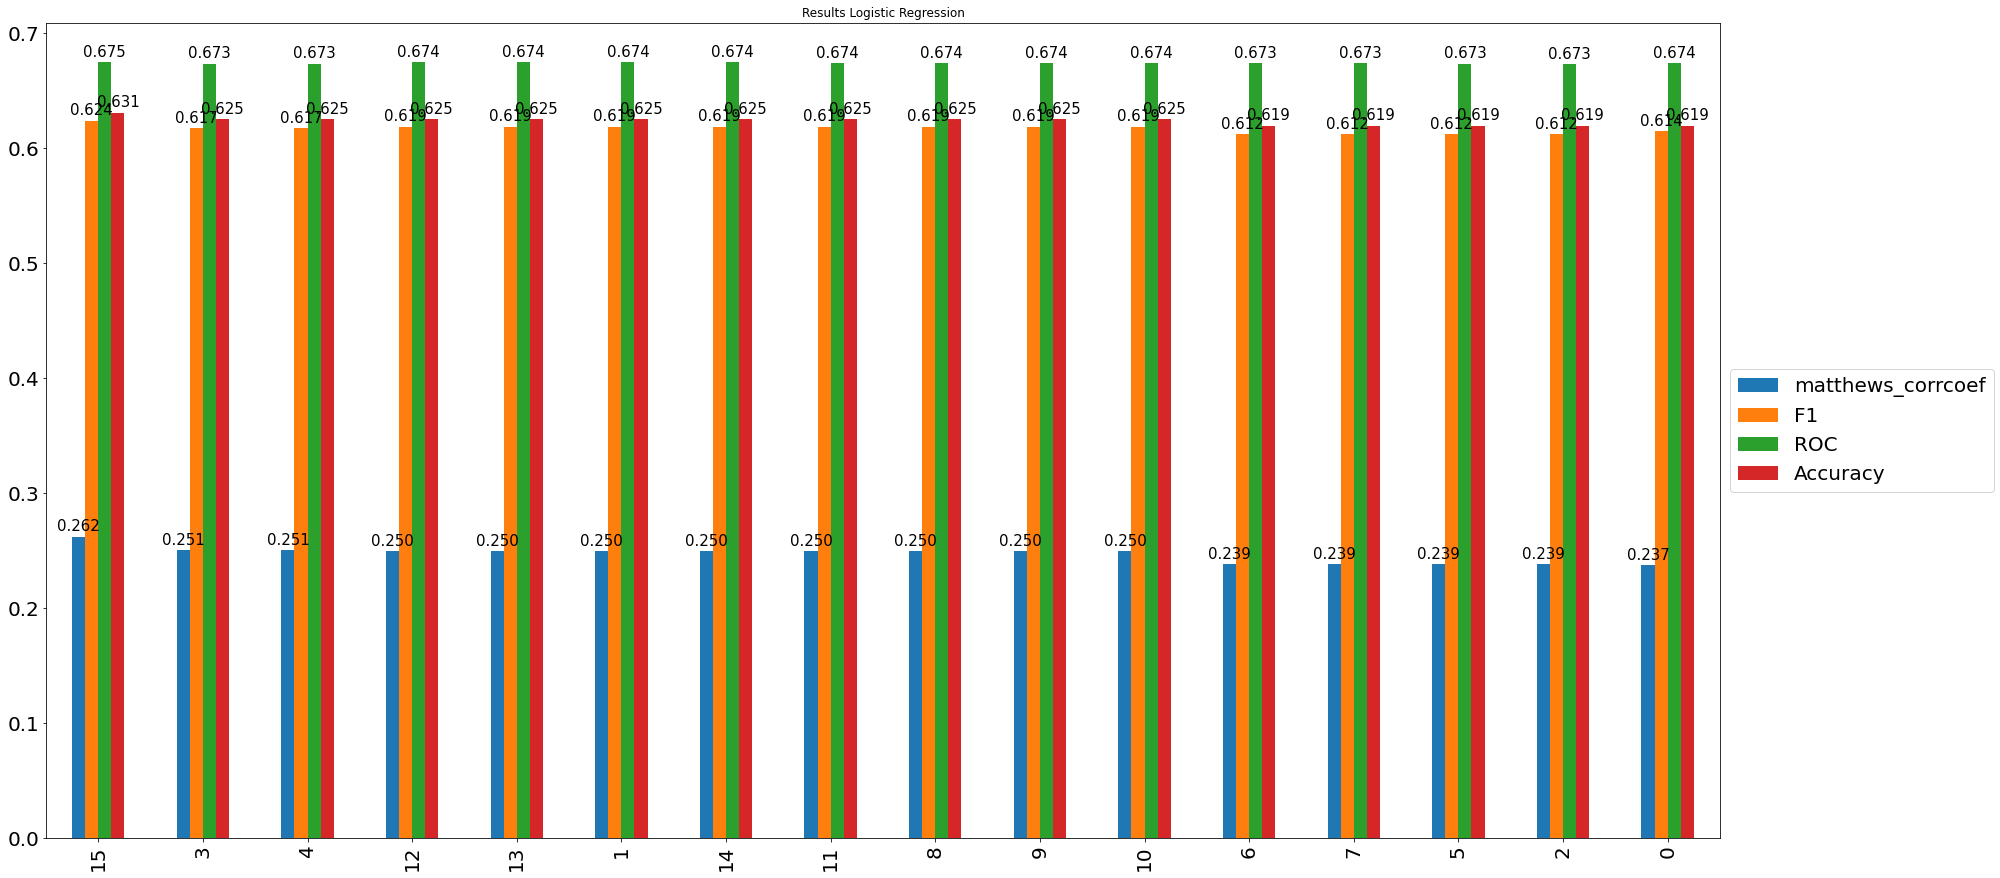

In [114]:
# Graph to display results of Logistic Regression
ax = LR__schwartau_sort[['matthews_corrcoef','F1','ROC','Accuracy']].plot(kind='bar',figsize=(30,15),title='Results Logistic Regression',fontsize=20)
ax.legend(prop=dict(size=20),loc='center left', bbox_to_anchor=(1.0, 0.5))
for p in ax.patches:
    text = ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    text.set_fontsize(15)
plt.rc('figure', titlesize=50)
plt.show()

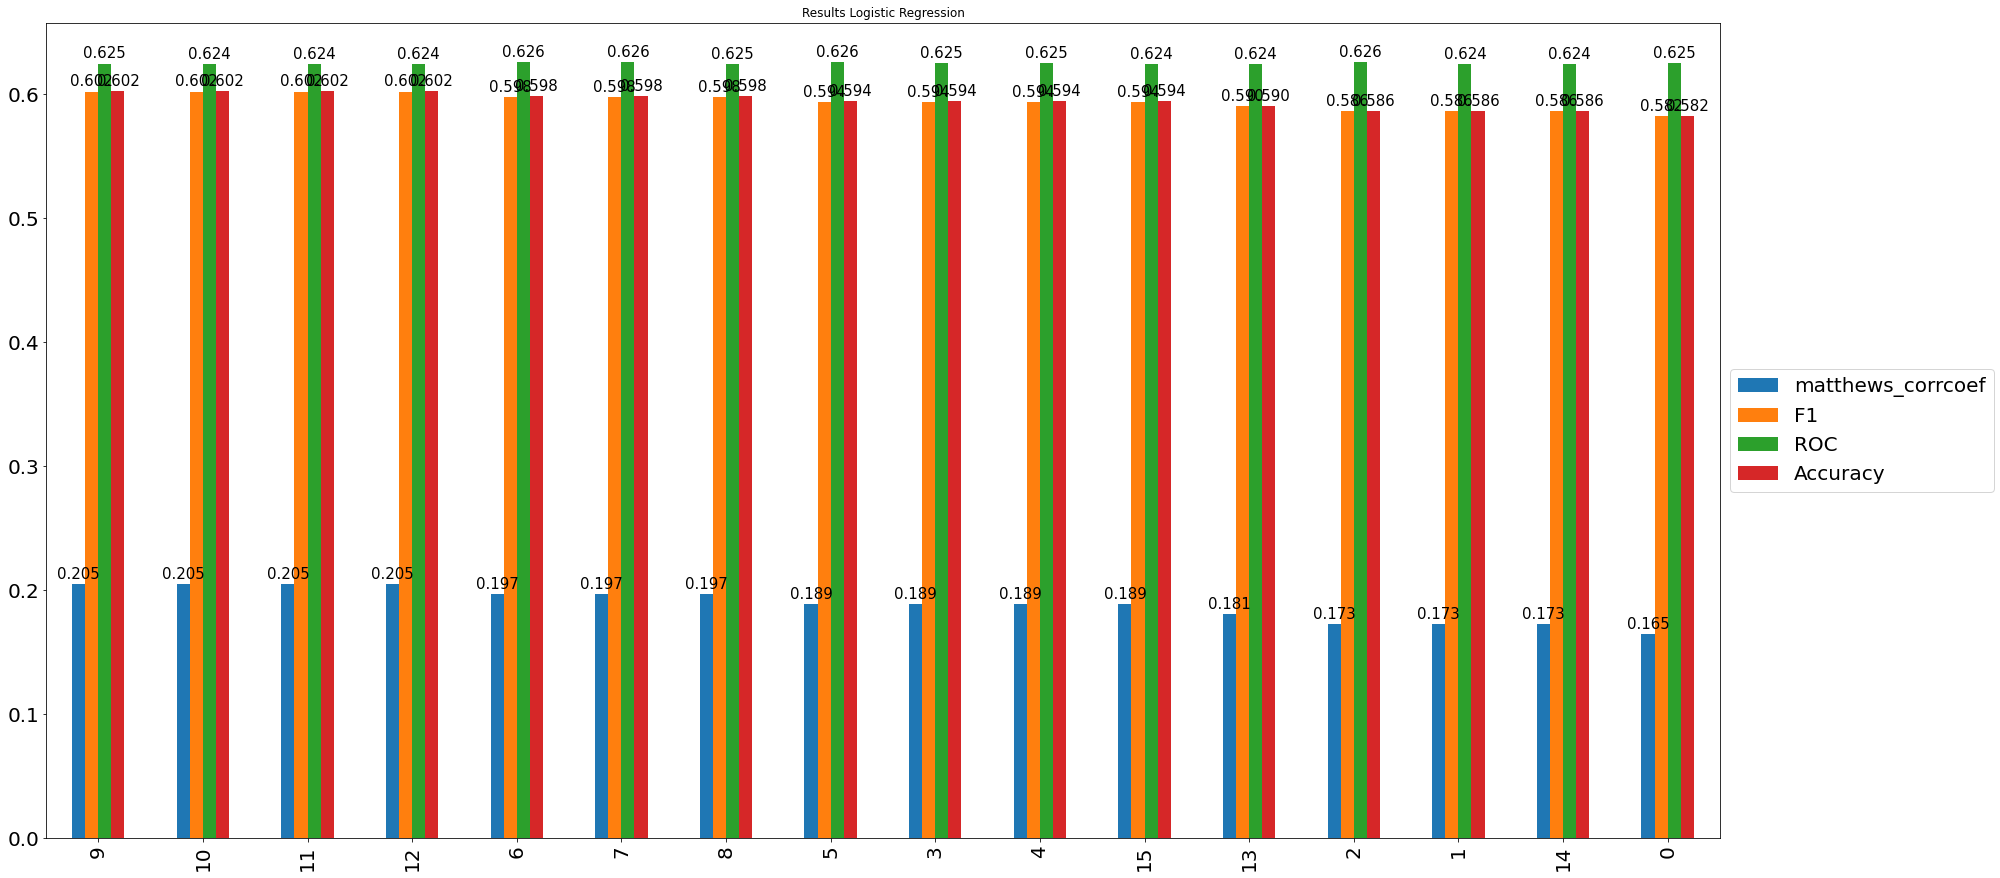

In [115]:
# Graph to display results of Logistic Regression
ax = LR__wurzburg_sort[['matthews_corrcoef','F1','ROC','Accuracy']].plot(kind='bar',figsize=(30,15),title='Results Logistic Regression',fontsize=20)
ax.legend(prop=dict(size=20),loc='center left', bbox_to_anchor=(1.0, 0.5))
for p in ax.patches:
    text = ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    text.set_fontsize(15)
plt.rc('figure', titlesize=50)
plt.show()